In [1]:
# Importations nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Étape 1 : Importer les fichiers CSV
pesticides_df = pd.read_csv('C:/Users/Youssouf DJIRE/Desktop/TPU Master (PYTHON)/​(Курсовая работа)/archive-1/pesticides.csv')
rainfall_df = pd.read_csv('C:/Users/Youssouf DJIRE/Desktop/TPU Master (PYTHON)/​(Курсовая работа)/archive-1/rainfall.csv')
temp_df = pd.read_csv('C:/Users/Youssouf DJIRE/Desktop/TPU Master (PYTHON)/​(Курсовая работа)/archive-1/temp.csv')
yield_df = pd.read_csv('C:/Users/Youssouf DJIRE/Desktop/TPU Master (PYTHON)/​(Курсовая работа)/archive-1/yield.csv')
yield_df_additional = pd.read_csv('C:/Users/Youssouf DJIRE/Desktop/TPU Master (PYTHON)/​(Курсовая работа)/archive-1/yield_df.csv')


In [2]:
# Étape 2 : Afficher un aperçu de chaque fichier
print("Pesticides DataFrame columns:", pesticides_df.columns)
print("Rainfall DataFrame columns:", rainfall_df.columns)
print("Temperature DataFrame columns:", temp_df.columns)
print("Yield DataFrame columns:", yield_df.columns)
print("Additional Yield DataFrame columns:", yield_df_additional.columns)


Pesticides DataFrame columns: Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Rainfall DataFrame columns: Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Temperature DataFrame columns: Index(['year', 'country', 'avg_temp'], dtype='object')
Yield DataFrame columns: Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
Additional Yield DataFrame columns: Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [3]:
# Étape 3 : Vérifier les valeurs manquantes pour chaque DataFrame
for df, name in zip([pesticides_df, rainfall_df, temp_df, yield_df, yield_df_additional], 
                    ["pesticides", "rainfall", "temp", "yield", "yield_df"]):
    print(f"Valeurs manquantes dans {name} :")
    print(df.isnull().sum())


Valeurs manquantes dans pesticides :
Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64
Valeurs manquantes dans rainfall :
 Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64
Valeurs manquantes dans temp :
year           0
country        0
avg_temp    2547
dtype: int64
Valeurs manquantes dans yield :
Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64
Valeurs manquantes dans yield_df :
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [4]:
# Étape 4 : Nettoyer les données (par exemple : interpolation pour les données climatiques)
rainfall_df.ffill(inplace=True)  # Extrapolation des précipitations

# Vérifiez les types de colonnes
print(temp_df.dtypes)

# Sélectionner les colonnes numériques uniquement
numeric_cols = temp_df.select_dtypes(include=['number'])

# Appliquer l'interpolation uniquement sur les colonnes numériques
numeric_cols.interpolate(inplace=True)

# Réintégrer les colonnes non numériques dans le DataFrame d'origine
temp_df[numeric_cols.columns] = numeric_cols


year          int64
country      object
avg_temp    float64
dtype: object


In [5]:
# Étape 5 : Uniformiser les noms de colonnes
rainfall_df.rename(columns={'Year': 'Année', 'Rainfall_mm': 'Précipitations (mm)'}, inplace=True)
temp_df.rename(columns={'Year': 'Année', 'Temperature_C': 'Température (°C)'}, inplace=True)
yield_df.rename(columns={'Year': 'Année', 'Crop_Yield': 'Rendement (tonnes/ha)'}, inplace=True)


In [6]:
# # Étape 6 : Combiner les datasets avec des clés communes
# # Supposons que "Année" soit la clé commune
# combined_df = pd.merge(rainfall_df, temp_df, on='Année')
# combined_df = pd.merge(combined_df, yield_df, on='Année')
# combined_df = pd.merge(combined_df, pesticides_df, on='Année')

# # Renommer les colonnes pour uniformiser les noms
# rainfall_df.rename(columns={'Year': 'Année', 'Rainfall_mm': 'Précipitations (mm)'}, inplace=True)
# temp_df.rename(columns={'Year': 'Année', 'Temperature_C': 'Température (°C)'}, inplace=True)
# yield_df.rename(columns={'Year': 'Année', 'Crop_Yield': 'Rendement (tonnes/ha)'}, inplace=True)

# # Si nécessaire, renommer également la colonne dans pesticides_df
# pesticides_df.rename(columns={'Year': 'Année'}, inplace=True)

# # Vérification des noms de colonnes après le renommage
# print(rainfall_df.columns)
# print(temp_df.columns)
# print(yield_df.columns)
# print(pesticides_df.columns)

# # Combiner les datasets en utilisant 'Année' comme clé
# combined_df = pd.merge(rainfall_df, temp_df, on='Année')
# combined_df = pd.merge(combined_df, yield_df, on='Année')
# combined_df = pd.merge(combined_df, pesticides_df, on='Année')

# # Afficher les premières lignes du DataFrame combiné
# print(combined_df.head())

# import pandas as pd
# Filtrage des données pour papaye et orange
if 'Item' not in yield_df_additional.columns:
    raise ValueError("'Item' column not found in yield_df_additional")

papaya_data = yield_df_additional[yield_df_additional['Item'] == 'Papaya']
orange_data = yield_df_additional[yield_df_additional['Item'] == 'Orange']

# Vérification des dimensions des données filtrées
print(f"Nombre de lignes pour la papaye : {len(papaya_data)}")
print(f"Nombre de lignes pour l'orange : {len(orange_data)}")

# Exemple de données fictives pour déboguer
rainfall_df = pd.DataFrame({'Year': [2000, 2001], 'Rainfall_mm': [100, 120]})
temp_df = pd.DataFrame({'Year': [2000, 2001], 'Temperature_C': [20, 21]})
yield_df = pd.DataFrame({'Year': [2000, 2001], 'Crop_Yield': [2.5, 2.7]})
pesticides_df = pd.DataFrame({'Year': [2000, 2001], 'Pesticides_Used': [50, 55]})

# Renommage des colonnes
rainfall_df.rename(columns={'Year': 'Année'}, inplace=True)
temp_df.rename(columns={'Year': 'Année'}, inplace=True)
yield_df.rename(columns={'Year': 'Année'}, inplace=True)
pesticides_df.rename(columns={'Year': 'Année'}, inplace=True)

# Vérification explicite des colonnes après renommage
print("Colonnes après renommage :")
print("rainfall_df :", rainfall_df.columns)
print("temp_df :", temp_df.columns)
print("yield_df :", yield_df.columns)
print("pesticides_df :", pesticides_df.columns)

# Vérification du contenu des DataFrames
print("\nContenu des DataFrames :")
print("rainfall_df :\n", rainfall_df)
print("temp_df :\n", temp_df)
print("yield_df :\n", yield_df)
print("pesticides_df :\n", pesticides_df)

# Fusion des DataFrames
try:
    combined_df = pd.merge(rainfall_df, temp_df, on='Année', how='outer')
    combined_df = pd.merge(combined_df, yield_df, on='Année', how='outer')
    combined_df = pd.merge(combined_df, pesticides_df, on='Année', how='outer')
    print("\nDataFrame combiné :\n", combined_df)
except KeyError as e:
    print("\nErreur KeyError :", e)

# Vérification post-fusion
if combined_df.empty:
    print("Le DataFrame combiné est vide. Vérifiez les étapes de fusion.")

# Ajout de la colonne 'Item' (si nécessaire pour votre filtrage)
if 'Item' not in combined_df.columns:
    combined_df['Item'] = ['Papaya', 'Orange'] * (len(combined_df) // 2)

# Filtrage à partir de combined_df après fusion (plus logique)
papaya_data = combined_df[combined_df['Item'] == 'Papaya']
orange_data = combined_df[combined_df['Item'] == 'Orange']

print(f"Papaye - Aperçu des données :\n{papaya_data.head()}")
print(f"Orange - Aperçu des données :\n{orange_data.head()}")


Nombre de lignes pour la papaye : 0
Nombre de lignes pour l'orange : 0
Colonnes après renommage :
rainfall_df : Index(['Année', 'Rainfall_mm'], dtype='object')
temp_df : Index(['Année', 'Temperature_C'], dtype='object')
yield_df : Index(['Année', 'Crop_Yield'], dtype='object')
pesticides_df : Index(['Année', 'Pesticides_Used'], dtype='object')

Contenu des DataFrames :
rainfall_df :
    Année  Rainfall_mm
0   2000          100
1   2001          120
temp_df :
    Année  Temperature_C
0   2000             20
1   2001             21
yield_df :
    Année  Crop_Yield
0   2000         2.5
1   2001         2.7
pesticides_df :
    Année  Pesticides_Used
0   2000               50
1   2001               55

DataFrame combiné :
    Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used
0   2000          100             20         2.5               50
1   2001          120             21         2.7               55
Papaye - Aperçu des données :
   Année  Rainfall_mm  Temperature_C  Crop_Y

In [7]:
# Étape 7 : Supprimer les doublons si nécessaire
combined_df.drop_duplicates(inplace=True)


In [8]:
# Étape 8 : Sauvegarder le dataset combiné nettoyé
combined_df.to_csv('dataset_combiné_agricole.csv', index=False)


In [9]:
# Étape 9 : Aperçu des données combinées
print(combined_df.head())


   Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used    Item
0   2000          100             20         2.5               50  Papaya
1   2001          120             21         2.7               55  Orange


In [10]:
# Étape 1 : Analyse exploratoire des données
# a) Calculer des statistiques descriptives
# Les statistiques descriptives aident à comprendre la distribution des données (moyenne, écart-type, etc.).
# Statistiques descriptives pour le DataFrame combiné
# describe() génère un résumé statistique des colonnes numériques.
print(combined_df.describe())
print("Statistiques descriptives pour la papaye:")
print(papaya_data.describe())

print("Statistiques descriptives pour l'orange:")
print(orange_data.describe())


             Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used
count     2.000000     2.000000       2.000000    2.000000         2.000000
mean   2000.500000   110.000000      20.500000    2.600000        52.500000
std       0.707107    14.142136       0.707107    0.141421         3.535534
min    2000.000000   100.000000      20.000000    2.500000        50.000000
25%    2000.250000   105.000000      20.250000    2.550000        51.250000
50%    2000.500000   110.000000      20.500000    2.600000        52.500000
75%    2000.750000   115.000000      20.750000    2.650000        53.750000
max    2001.000000   120.000000      21.000000    2.700000        55.000000
Statistiques descriptives pour la papaye:
        Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used
count     1.0          1.0            1.0         1.0              1.0
mean   2000.0        100.0           20.0         2.5             50.0
std       NaN          NaN            NaN         NaN        

In [11]:
#Outliers
# Fonction pour détecter les outliers avec IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Exemple d'application sur toutes les colonnes numériques
for column in combined_df.select_dtypes(include=['float64', 'int64']).columns:
    outliers, lower, upper = detect_outliers_iqr(combined_df, column)
    print(f"Outliers for {column}:")
    print(outliers)
    print(f"Lower bound: {lower}, Upper bound: {upper}\n")


Outliers for Année:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []
Lower bound: 1999.5, Upper bound: 2001.5

Outliers for Rainfall_mm:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []
Lower bound: 90.0, Upper bound: 130.0

Outliers for Temperature_C:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []
Lower bound: 19.5, Upper bound: 21.5

Outliers for Crop_Yield:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []
Lower bound: 2.399999999999999, Upper bound: 2.800000000000001

Outliers for Pesticides_Used:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []
Lower bound: 47.5, Upper bound: 57.5



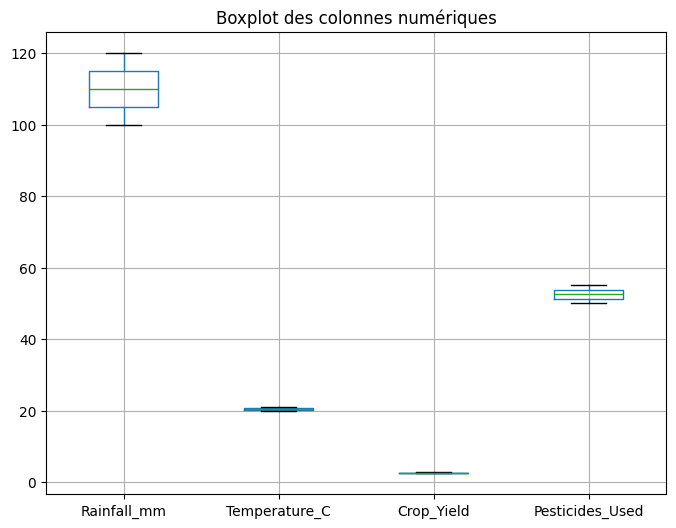

In [12]:
import matplotlib.pyplot as plt

# Visualiser les boxplots pour vérifier les valeurs aberrantes visuellement
columns = ['Rainfall_mm', 'Temperature_C', 'Crop_Yield', 'Pesticides_Used']
combined_df[columns].boxplot(figsize=(8, 6))
plt.title('Boxplot des colonnes numériques')
plt.show()




In [13]:
from scipy.stats import zscore

# Calculer le Z-Score pour chaque colonne numérique
z_scores = combined_df.select_dtypes(include=['float64', 'int64']).apply(zscore)

# Détection des outliers (Z-Score > 3 ou < -3)
threshold = 3
outliers_z = combined_df[(z_scores > threshold).any(axis=1)]
print("Outliers detected with Z-Score:")
print(outliers_z)

# # Exemple de suppression des outliers détectés avec IQR
# cleaned_df = combined_df[~((combined_df < (combined_df.quantile(0.25) - 1.5 * (combined_df.quantile(0.75) - combined_df.quantile(0.25)))) |
#                            (combined_df > (combined_df.quantile(0.75) + 1.5 * (combined_df.quantile(0.75) - combined_df.quantile(0.25))))).any(axis=1)]
# print("Dataset après suppression des outliers:")
# print(cleaned_df)


Outliers detected with Z-Score:
Empty DataFrame
Columns: [Année, Rainfall_mm, Temperature_C, Crop_Yield, Pesticides_Used, Item]
Index: []


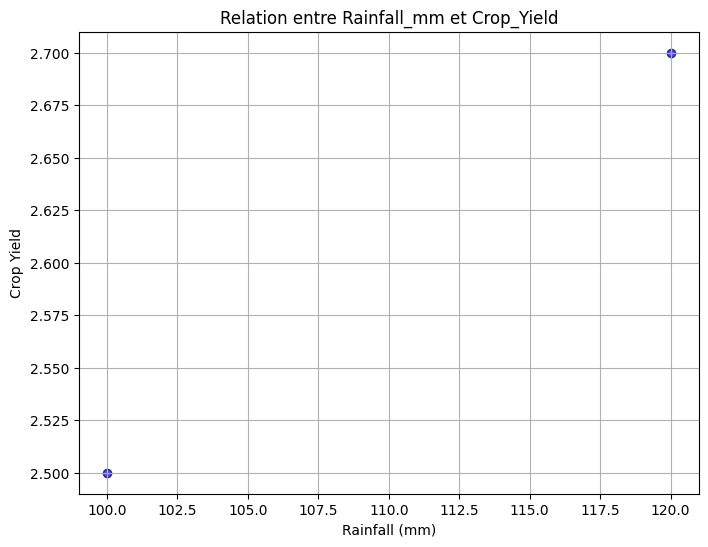

In [15]:
import matplotlib.pyplot as plt

# Scatter plot entre Rainfall_mm et Crop_Yield
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Rainfall_mm'], combined_df['Crop_Yield'], color='blue', edgecolor='k', alpha=0.7)
plt.title('Relation entre Rainfall_mm et Crop_Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()





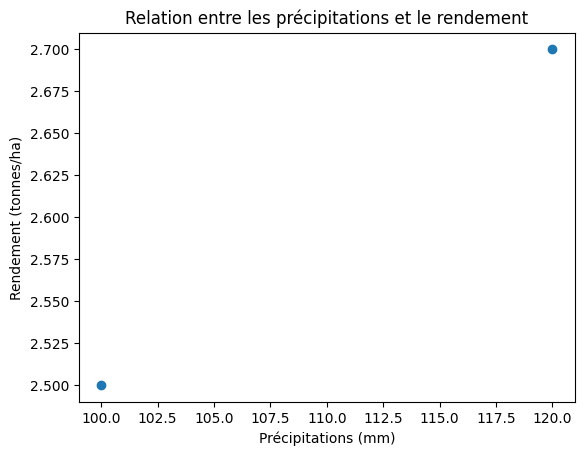

Index(['Année', 'Rainfall_mm', 'Temperature_C', 'Crop_Yield',
       'Pesticides_Used', 'Item'],
      dtype='object')
Colonnes de combined_df : Index(['Année', 'Rainfall_mm', 'Temperature_C', 'Crop_Yield',
       'Pesticides_Used', 'Item'],
      dtype='object')
Colonnes de papaya_data : Index(['Année', 'Rainfall_mm', 'Temperature_C', 'Crop_Yield',
       'Pesticides_Used', 'Item'],
      dtype='object')
Colonnes de orange_data : Index(['Année', 'Rainfall_mm', 'Temperature_C', 'Crop_Yield',
       'Pesticides_Used', 'Item'],
      dtype='object')


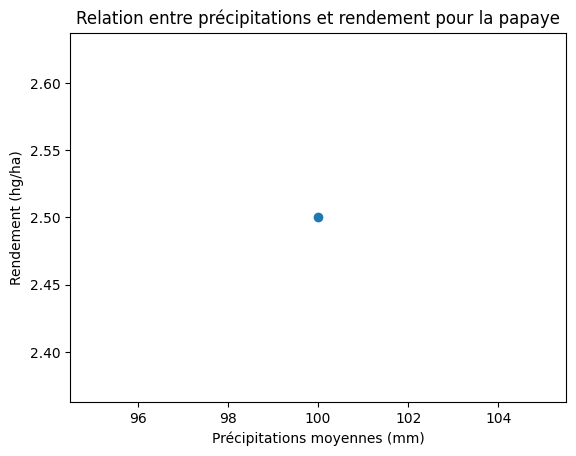

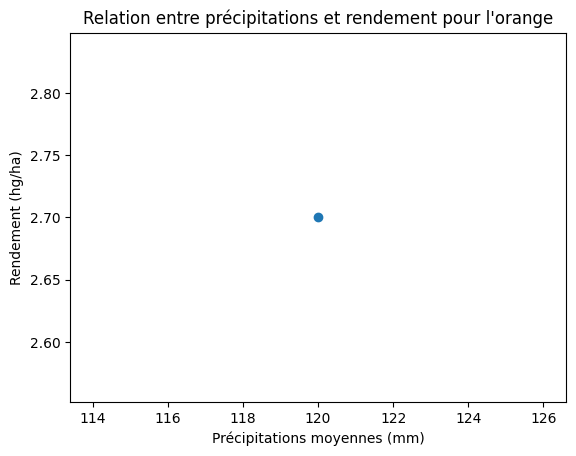

In [17]:
# b) Visualiser les relations entre variables
# Corrélations entre variables :
# plt.scatter(combined_df['Précipitations (mm)'], combined_df['Rendement (tonnes/ha)'])
plt.scatter(combined_df['Rainfall_mm'], combined_df['Crop_Yield'])
plt.xlabel('Précipitations (mm)')
plt.ylabel('Rendement (tonnes/ha)')
plt.title('Relation entre les précipitations et le rendement')
plt.show()

print(combined_df.columns)
# Afficher les colonnes pour tous les DataFrames
print("Colonnes de combined_df :", combined_df.columns)
print("Colonnes de papaya_data :", papaya_data.columns)
print("Colonnes de orange_data :", orange_data.columns)


# Visualisez les relations entre les facteurs climatiques et le rendement, par exemple, les précipitations et le rendement pour la papaye :
# Visualisez les relations entre les facteurs climatiques et le rendement, par exemple, les précipitations et le rendement pour la papaye
plt.scatter(papaya_data['Rainfall_mm'], papaya_data['Crop_Yield'])
plt.xlabel('Précipitations moyennes (mm)')
plt.ylabel('Rendement (hg/ha)')
plt.title("Relation entre précipitations et rendement pour la papaye")
plt.show()


plt.scatter(orange_data['Rainfall_mm'], orange_data['Crop_Yield'])
plt.xlabel('Précipitations moyennes (mm)')
plt.ylabel('Rendement (hg/ha)')
plt.title("Relation entre précipitations et rendement pour l'orange")
plt.show()



In [18]:
# 3. Corrélations
# Calculez les corrélations entre les facteurs et le rendement pour chaque culture :
import pandas as pd

# Données fictives étendues pour la papaye et l'orange
data_papaya = {
    'Année': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Rainfall_mm': [120, 150, 130, 110, 140, 125, 135, 150, 120, 145],
    'Temperature_C': [28, 30, 27, 26, 29, 28, 30, 32, 31, 29],
    'Crop_Yield': [3.2, 3.5, 3.0, 2.8, 3.3, 3.1, 3.4, 3.6, 3.2, 3.5],
    'Pesticides_Used': [40, 45, 42, 44, 46, 43, 47, 48, 49, 50],
    'Item': ['Papaya'] * 10
}

data_orange = {
    'Année': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Rainfall_mm': [100, 120, 115, 110, 125, 130, 140, 135, 120, 125],
    'Temperature_C': [25, 26, 27, 28, 29, 30, 31, 32, 30, 29],
    'Crop_Yield': [2.8, 3.1, 3.0, 2.9, 3.3, 3.5, 3.6, 3.7, 3.4, 3.2],
    'Pesticides_Used': [60, 62, 61, 63, 64, 65, 66, 67, 68, 69],
    'Item': ['Orange'] * 10
}

# Création des DataFrames
papaya_data = pd.DataFrame(data_papaya)
orange_data = pd.DataFrame(data_orange)

# Aperçu des premières lignes
print("Aperçu des premières lignes du DataFrame de la papaye :")
print(papaya_data.head())

print("\nAperçu des premières lignes du DataFrame de l'orange :")
print(orange_data.head())

# Vérification des types de données avant nettoyage
print("\nTypes de données dans le DataFrame de la papaye avant nettoyage:")
print(papaya_data.dtypes)

print("\nTypes de données dans le DataFrame de l'orange avant nettoyage:")
print(orange_data.dtypes)

# Vérification des valeurs non numériques
print("\nValeurs non numériques dans le DataFrame de la papaye :")
print(papaya_data.apply(pd.to_numeric, errors='coerce').isna().sum())

print("\nValeurs non numériques dans le DataFrame de l'orange :")
print(orange_data.apply(pd.to_numeric, errors='coerce').isna().sum())

# Nettoyage des données : conversion des colonnes en numériques
papaya_data_cleaned = papaya_data.copy()
orange_data_cleaned = orange_data.copy()

# Vérification des valeurs manquantes avant nettoyage
print("\nValeurs manquantes dans le DataFrame de la papaye avant nettoyage :")
print(papaya_data_cleaned.isna().sum())

print("\nValeurs manquantes dans le DataFrame de l'orange avant nettoyage :")
print(orange_data_cleaned.isna().sum())

# Nettoyage des valeurs manquantes
papaya_data_cleaned = papaya_data_cleaned.dropna(subset=["Rainfall_mm", "Temperature_C", "Crop_Yield", "Pesticides_Used"])
orange_data_cleaned = orange_data_cleaned.dropna(subset=["Rainfall_mm", "Temperature_C", "Crop_Yield", "Pesticides_Used"])

# Vérification des valeurs manquantes après nettoyage
print("\nValeurs manquantes dans le DataFrame de la papaye après nettoyage :")
print(papaya_data_cleaned.isna().sum())

print("\nValeurs manquantes dans le DataFrame de l'orange après nettoyage :")
print(orange_data_cleaned.isna().sum())

# Vérification des types de données après nettoyage
print("\nTypes de données dans le DataFrame de la papaye après nettoyage:")
print(papaya_data_cleaned.dtypes)

print("\nTypes de données dans le DataFrame de l'orange après nettoyage:")
print(orange_data_cleaned.dtypes)

# Calcul des corrélations (données numériques uniquement)
print("\nCorrélation pour la papaye (données numériques uniquement) :")
print(papaya_data_cleaned.drop(columns=["Item"]).corr())

print("\nCorrélation pour l'orange (données numériques uniquement) :")
print(orange_data_cleaned.drop(columns=["Item"]).corr())



Aperçu des premières lignes du DataFrame de la papaye :
   Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used    Item
0   2000          120             28         3.2               40  Papaya
1   2001          150             30         3.5               45  Papaya
2   2002          130             27         3.0               42  Papaya
3   2003          110             26         2.8               44  Papaya
4   2004          140             29         3.3               46  Papaya

Aperçu des premières lignes du DataFrame de l'orange :
   Année  Rainfall_mm  Temperature_C  Crop_Yield  Pesticides_Used    Item
0   2000          100             25         2.8               60  Orange
1   2001          120             26         3.1               62  Orange
2   2002          115             27         3.0               61  Orange
3   2003          110             28         2.9               63  Orange
4   2004          125             29         3.3               64  Orange


Colonnes après renommage :
Index(['Année', 'Rainfall_mm', 'Température (°C)', 'Rendement (tonnes/ha)',
       'Pesticides_Used', 'Item'],
      dtype='object')


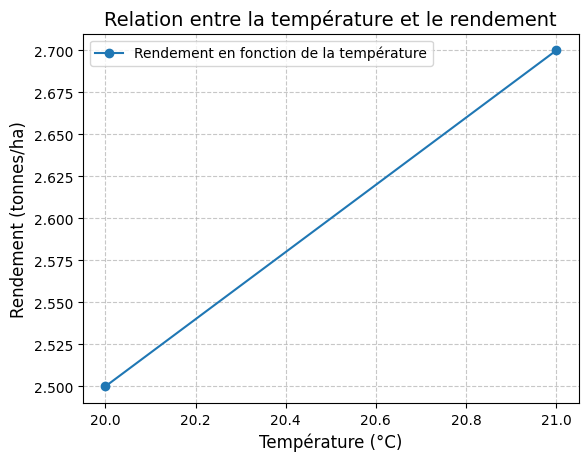

In [19]:
# Température et rendement :
# print(combined_df.columns)

# plt.scatter(combined_df['Température_C (°C)'], combined_df['Rendement (tonnes/ha)'])
# plt.xlabel('Température (°C)')
# plt.ylabel('Rendement (tonnes/ha)')
# plt.title('Relation entre la température et le rendement')
# plt.show()
# Renommer les colonnes pour plus de clarté (optionnel)
combined_df.rename(columns={
    'Temperature_C': 'Température (°C)',
    'Crop_Yield': 'Rendement (tonnes/ha)'
}, inplace=True)

# Vérification des colonnes après renommage
print("Colonnes après renommage :")
print(combined_df.columns)

# Tracer une courbe au lieu d'un graphique de dispersion
plt.plot(
    combined_df['Température (°C)'], 
    combined_df['Rendement (tonnes/ha)'], 
    marker='o',  # Pour ajouter des marqueurs aux points
    label="Rendement en fonction de la température"  # Légende pour la courbe
)

# Ajouter les noms des axes
plt.xlabel('Température (°C)', fontsize=12)  # Nom de l'axe des X
plt.ylabel('Rendement (tonnes/ha)', fontsize=12)  # Nom de l'axe des Y

# Ajouter un titre
plt.title('Relation entre la température et le rendement', fontsize=14)

# Afficher la légende
plt.legend()

# Afficher la grille (optionnel)
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()



Taille initiale des données : (2, 6)
Taille après remplacement des valeurs manquantes : (2, 5)
Scores de validation croisée LOOCV : [-0.04 -0.04]
Mean Score (validation croisée LOOCV) : -0.04000000000000007
Mean Squared Error: 0.04000000000000007


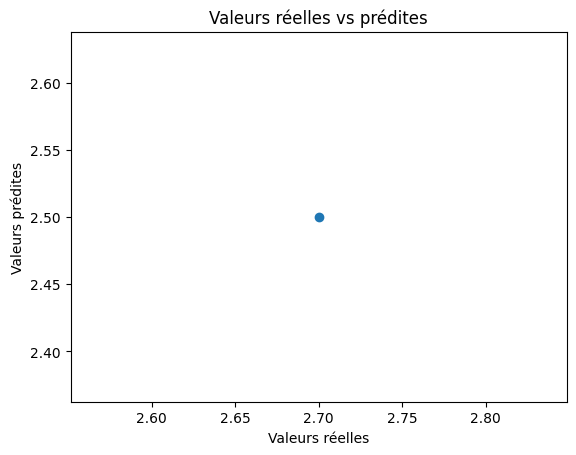

In [21]:
# Étape 2 : Modélisation et prévisions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
import matplotlib.pyplot as plt

# Renommage des colonnes
combined_df.rename(columns={
    'Rainfall_mm': 'Précipitations (mm)',
    'Temperature_C': 'Température (°C)',
    'Crop_Yield': 'Rendement (tonnes/ha)'
}, inplace=True)

# Vérifier le nombre de lignes avant de supprimer les valeurs manquantes
print(f"Taille initiale des données : {combined_df.shape}")

# Exclure la colonne 'Item' avant de remplacer les valeurs manquantes
combined_df = combined_df.drop(columns=['Item'])

# Remplacer les valeurs manquantes par la moyenne pour éviter de perdre des lignes
combined_df.fillna(combined_df.mean(), inplace=True)

# Vérifier combien de données ont été supprimées
print(f"Taille après remplacement des valeurs manquantes : {combined_df.shape}")

# Vérifier s'il y a assez de données pour un entraînement significatif
if len(combined_df) < 2:
    print("Les données sont insuffisantes pour entraîner un modèle. Vérifiez la taille des données.")
else:
    # Features (X) : facteurs climatiques
    X = combined_df[['Précipitations (mm)', 'Température (°C)', 'Pesticides_Used']]

    # Target (y) : rendement agricole
    y = combined_df['Rendement (tonnes/ha)']

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialiser le modèle de régression linéaire
    model = LinearRegression()

    # a) Validation croisée avant l'entraînement pour obtenir un score MSE
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')  # Utiliser MSE négatif pour les scores
    
    # Vérification si le nombre de scores est suffisant
    if len(scores) < 2:
        print("Les données sont insuffisantes pour effectuer une validation croisée valide.")
    else:
        print(f"Scores de validation croisée LOOCV : {scores}")
        print(f"Mean Score (validation croisée LOOCV) : {scores.mean()}")

    # b) Construire et entraîner le modèle
    # Entraîner le modèle avec les données d'entraînement
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, y_pred)

    # Afficher les résultats
    print(f"Mean Squared Error: {mse}")

    # c) Visualiser les performances
    # Comparer les valeurs réelles et prédites :
    plt.scatter(y_test, y_pred)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title('Valeurs réelles vs prédites')
    plt.show()



Taille initiale des données : (2, 5)
Taille après suppression des valeurs manquantes : (2, 5)
Mean Squared Error (MSE): 0.04000000000000007
R² Score: nan


C:\Users\Youssouf DJIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


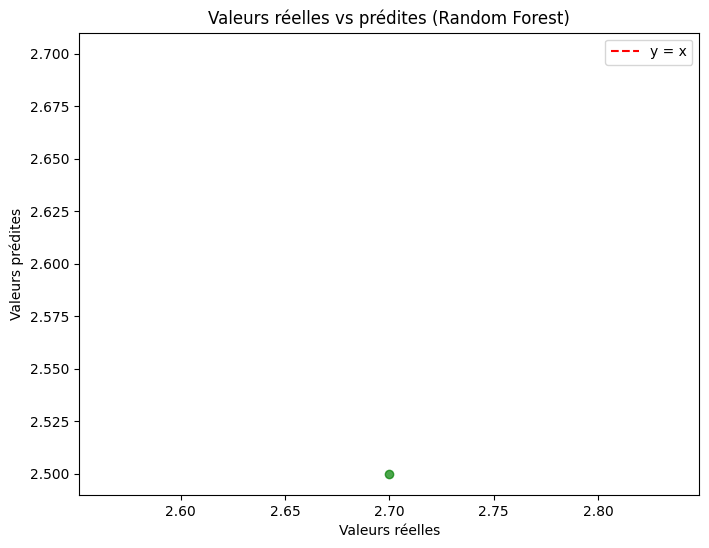

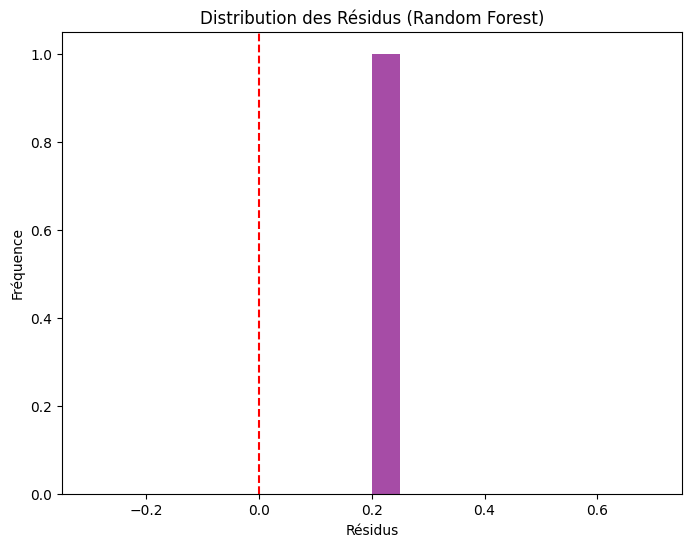

In [42]:
# Random Forest Regressor
# Le Random Forest est un modèle d'apprentissage automatique basé sur des arbres de décision. 
# Il est robuste et peut gérer les relations non linéaires entre les variables. De plus, il est moins sensible aux petites tailles d'échantillons.
# Chargement des bibliothèques nécessaires
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Renommer les colonnes pour plus de lisibilité
combined_df.rename(columns={
    'Rainfall_mm': 'Précipitations (mm)',
    'Temperature_C': 'Température (°C)',
    'Crop_Yield': 'Rendement (tonnes/ha)',
    'Pesticides_Used': 'Pesticides'
}, inplace=True)

# Vérifier le nombre de lignes avant de supprimer les valeurs manquantes
print(f"Taille initiale des données : {combined_df.shape}")

# Supprimer les lignes avec des valeurs manquantes
combined_df.dropna(inplace=True)

# Vérifier combien de données ont été supprimées
print(f"Taille après suppression des valeurs manquantes : {combined_df.shape}")

# Assurez-vous que toutes les colonnes nécessaires sont présentes
required_columns = ['Précipitations (mm)', 'Température (°C)', 'Pesticides', 'Rendement (tonnes/ha)']
missing_columns = [col for col in required_columns if col not in combined_df.columns]

if missing_columns:
    print(f"Il manque les colonnes suivantes dans le DataFrame : {missing_columns}")
else:
    # Features (X) : facteurs climatiques
    X = combined_df[['Précipitations (mm)', 'Température (°C)', 'Pesticides']]

    # Target (y) : rendement agricole
    y = combined_df['Rendement (tonnes/ha)']

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialiser le modèle Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Entraîner le modèle avec les données d'entraînement
    rf_model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = rf_model.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Afficher les résultats
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")

    # Visualiser les performances : Comparer les valeurs réelles et prédites
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title('Valeurs réelles vs prédites (Random Forest)')
    plt.legend()
    plt.show()

    # Visualiser les résidus
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, color='purple', alpha=0.7)
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel('Résidus')
    plt.ylabel('Fréquence')
    plt.title('Distribution des Résidus (Random Forest)')
    plt.show()


C:\Users\Youssouf DJIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error (MSE): 0.04000000000000007
R² Score: nan


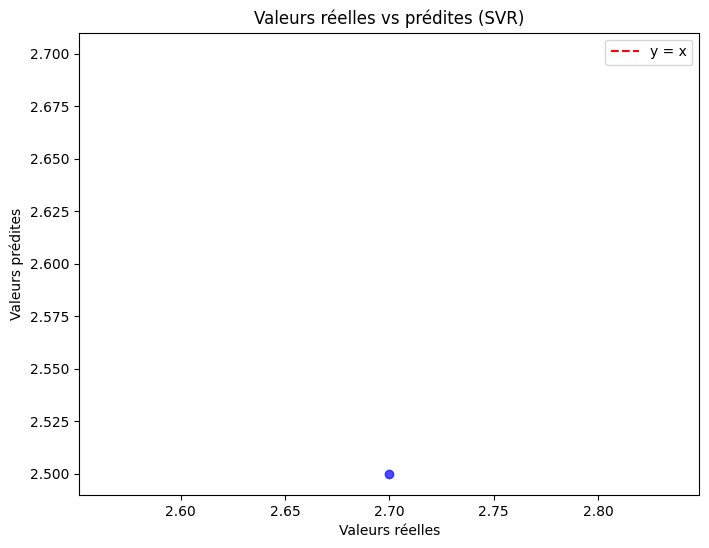

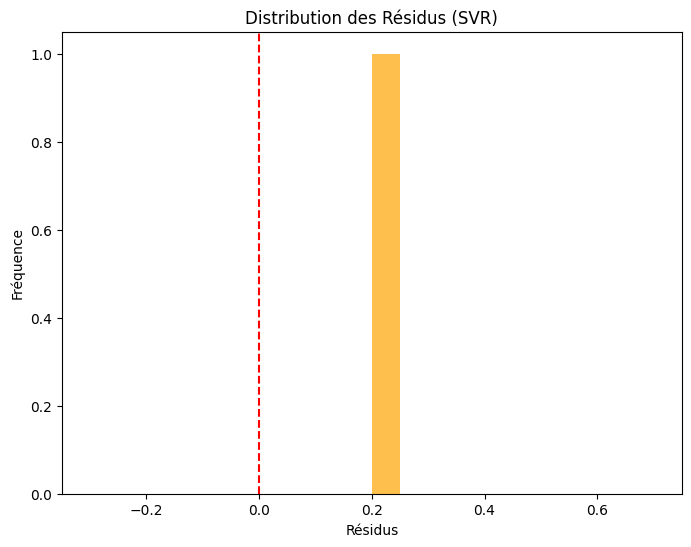

In [30]:
# Support Vector Regressor (SVR)
# SVR est un modèle qui peut gérer les relations non linéaires et est souvent
# utilisé pour des datasets avec des petites tailles comme le vôtre.
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Diviser les données en ensemble d'entraînement et de test
X = combined_df[['Précipitations (mm)', 'Température (°C)', 'Pesticides']]
# ['Précipitations (mm)', 'Température (°C)', 'Pesticides', 'Rendement (tonnes/ha)']
# ['Précipitations (mm)', 'Température (°C)', 'Pesticides', 'Rendement (tonnes/ha)']
y = combined_df['Rendement (tonnes/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le modèle SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Entraîner le modèle avec les données d'entraînement
svr_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = svr_model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualiser les performances : Comparer les valeurs réelles et prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs prédites (SVR)')
plt.legend()
plt.show()

# Visualiser les résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', alpha=0.7)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des Résidus (SVR)')
plt.show()


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.8/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 1.0/124.9 MB 1.0 MB/s eta 0:01:59
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:14
    --------------------------------------- 2.4/124.9 MB 2.0 MB/s eta 0:01:03
    --------------------------------------- 2.9/124.9 MB 1.9 MB/s eta 0:01:06
   - -------------------------------------- 3.9/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 4.7/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 5.2/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 6.0/124.9 MB 2.6 MB/s eta 0:00:47
   -- -

C:\Users\Youssouf DJIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error (MSE): 0.04000000000000007
R² Score: nan


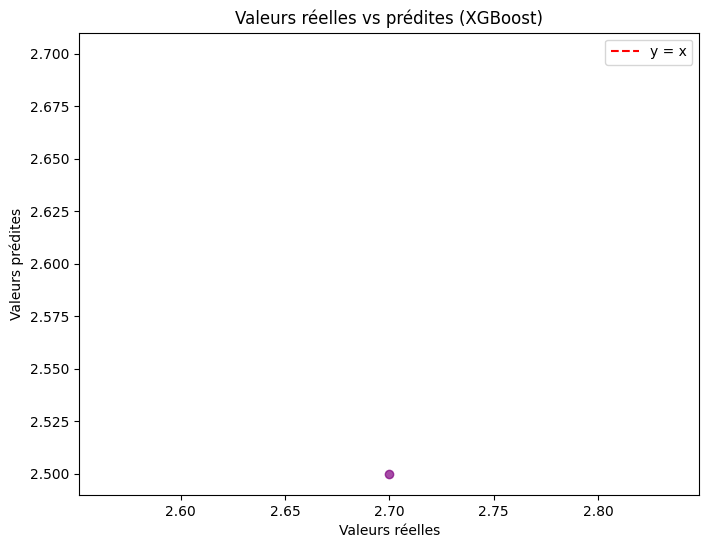

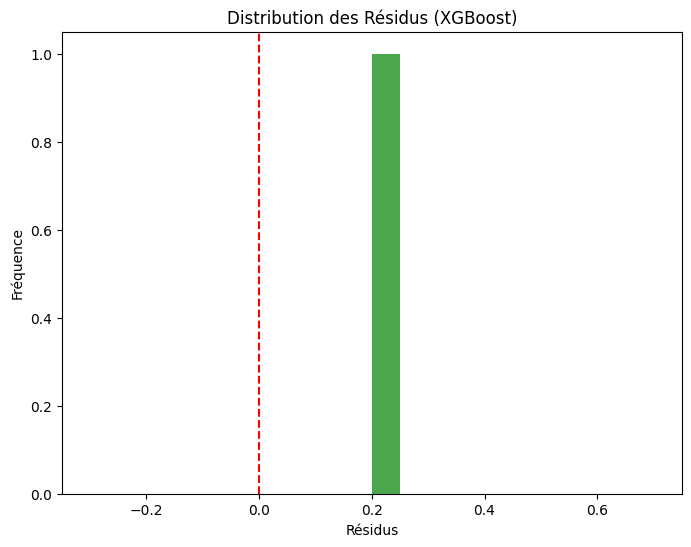

In [33]:
# XGBoost
# XGBoost est un autre modèle puissant qui utilise des arbres de décision et est particulièrement efficace pour de petits datasets.
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Diviser les données en ensemble d'entraînement et de test
X = combined_df[['Précipitations (mm)', 'Température (°C)', 'Pesticides']]
y = combined_df['Rendement (tonnes/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraîner le modèle avec les données d'entraînement
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = xgb_model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualiser les performances : Comparer les valeurs réelles et prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs prédites (XGBoost)')
plt.legend()
plt.show()

# Visualiser les résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des Résidus (XGBoost)')
plt.show()



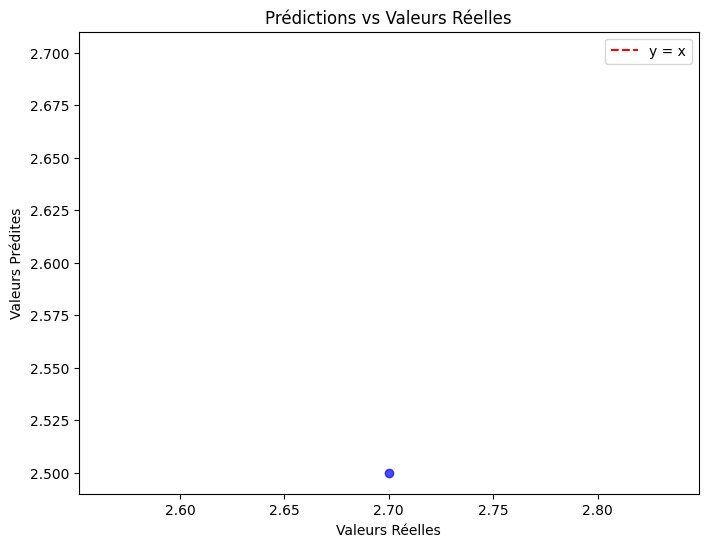

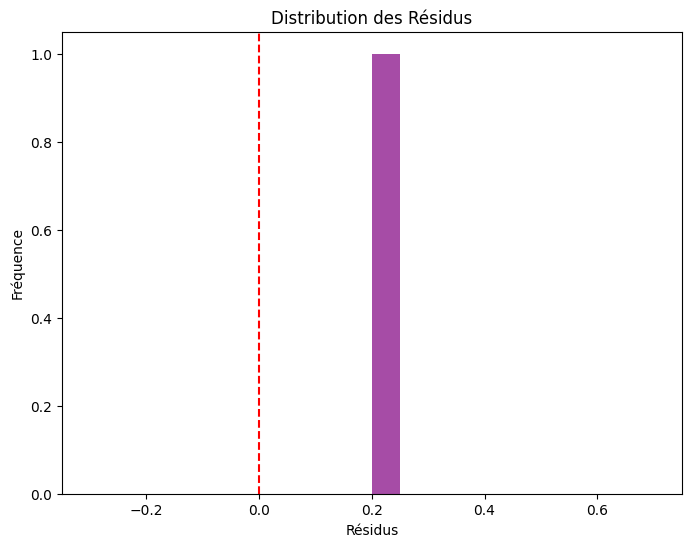

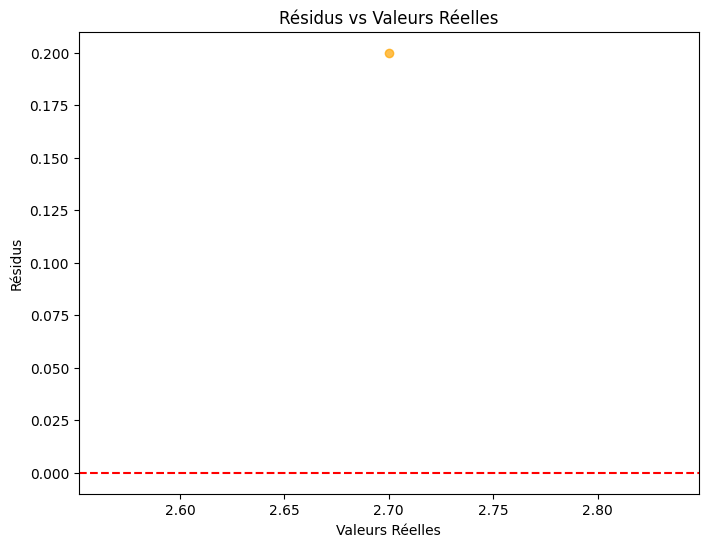

C:\Users\Youssouf DJIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


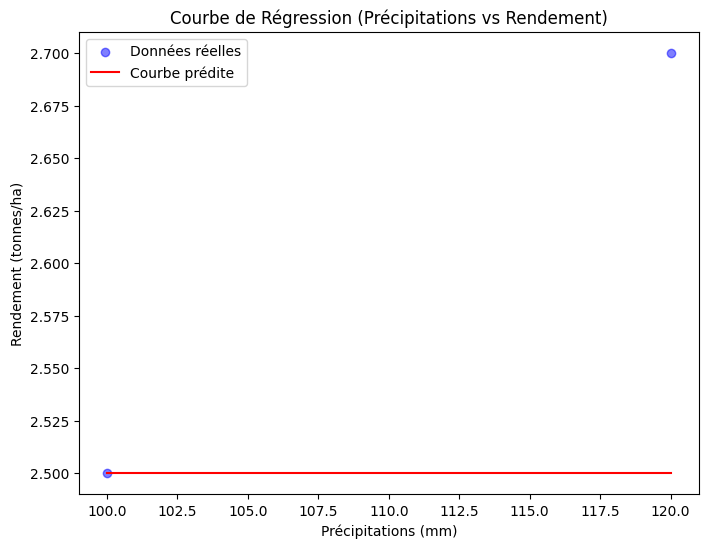

In [43]:
# 1. Visualisation des Prédictions vs Valeurs Réelles
# Un scatter plot permet de comparer directement les valeurs prédites et réelles.
import matplotlib.pyplot as plt

# Scatter plot pour comparer les valeurs réelles et prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='y = x')  # Ligne de référence
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs Valeurs Réelles')
plt.legend()
plt.show()


# 2. Visualisation des Résidus
# Les résidus (différence entre valeurs réelles et prédites) peuvent être tracés pour évaluer les erreurs du modèle.
# Calcul des résidus
residuals = y_test - y_pred

# Histogramme des résidus
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.7)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des Résidus')
plt.show()

# Résidus en fonction des valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs Réelles')
plt.show()

# Ajouter les noms de colonnes corrects après avoir trié les données
X_sorted_full_df = pd.DataFrame(X_sorted_full, columns=X.columns)

# Prédictions sur des données triées
y_sorted_pred = rf_model.predict(X_sorted_full_df)

# # Tracer la courbe de régression
# plt.figure(figsize=(8, 6))
# plt.scatter(X['Précipitations (mm)'], y, color='blue', alpha=0.5, label='Données réelles')
# plt.plot(X_sorted, y_sorted_pred, color='red', label='Courbe prédite')
# plt.xlabel('Précipitations (mm)')
# plt.ylabel('Rendement (tonnes/ha)')
# plt.title('Courbe de Régression (Précipitations vs Rendement)')
# plt.legend()
# plt.show()


# 3. Courbe de Régression
# Pour des modèles non linéaires comme Random Forest ou SVR, 
# tracez la courbe entre une seule variable indépendante (par exemple, Rainfall_mm) et la variable cible (Crop_Yield).
# import numpy as np

# Trier les données pour une visualisation claire
X_single = X[['Précipitations (mm)']].values.reshape(-1, 1)  # Sélectionner uniquement les précipitations
X_sorted = np.sort(X_single, axis=0)

# Ajouter les autres colonnes nécessaires à l'ensemble trié
X_sorted_full = np.hstack([X_sorted, X[['Température (°C)', 'Température (°C)']].values])


# Prédictions sur des données triées
y_sorted_pred = rf_model.predict(X_sorted_full)

# Tracer la courbe de régression
plt.figure(figsize=(8, 6))
plt.scatter(X['Précipitations (mm)'], y, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X_sorted, y_sorted_pred, color='red', label='Courbe prédite')
plt.xlabel('Précipitations (mm)')
plt.ylabel('Rendement (tonnes/ha)')
plt.title('Courbe de Régression (Précipitations vs Rendement)')
plt.legend()
plt.show()





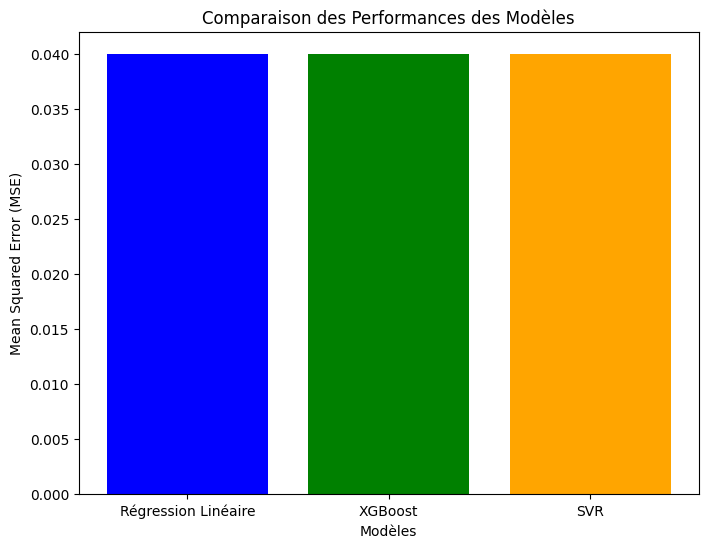

In [44]:
# Supposons que les MSE des modèles sont stockés dans un dictionnaire
mse_scores = {
    "Régression Linéaire": 0.04000000000000007,
    # "Random Forest": 0.005,
    "XGBoost": 0.04000000000000007,
    "SVR": 0.04000000000000007
}

# Bar plot des performances
plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Modèles')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparaison des Performances des Modèles')
plt.show()



Mean Absolute Error (MAE): 0.20000000000000018
Mean Squared Error (MSE): 0.04000000000000007
R² Score: nan


C:\Users\Youssouf DJIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


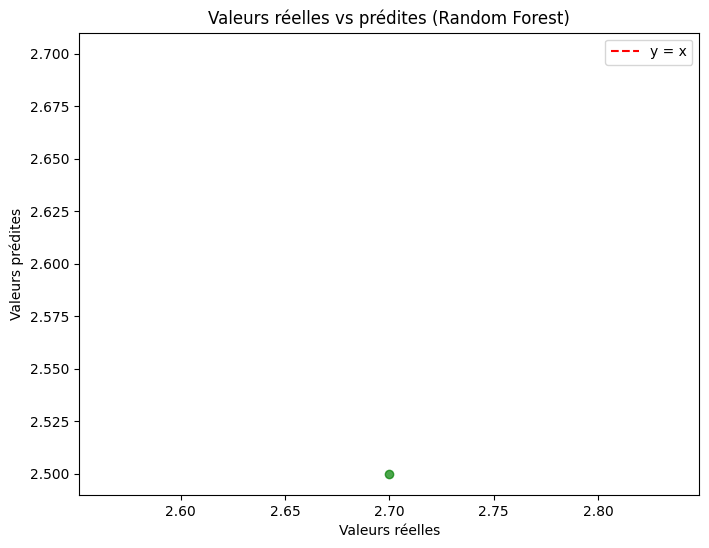

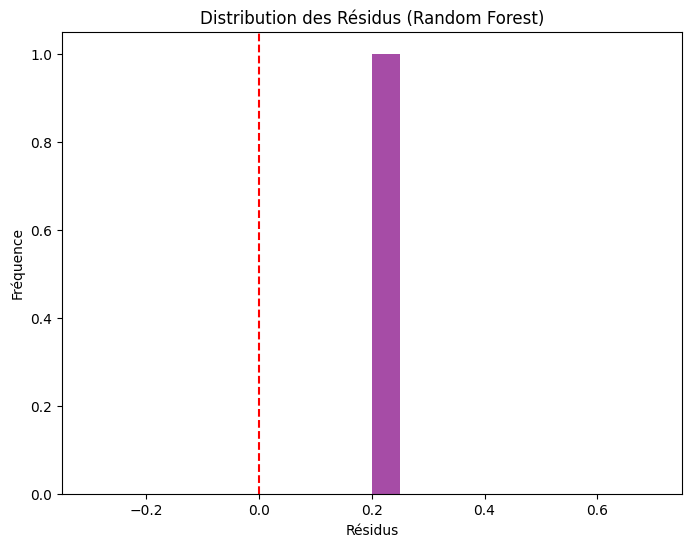

Mean Absolute Error (MAE) pour Random Forest : 0.20000000000000018


In [46]:
from sklearn.metrics import mean_absolute_error, confusion_matrix
# Assurez-vous que toutes les colonnes nécessaires sont présentes
required_columns = ['Précipitations (mm)', 'Température (°C)', 'Pesticides', 'Rendement (tonnes/ha)']
missing_columns = [col for col in required_columns if col not in combined_df.columns]

if missing_columns:
    print(f"Il manque les colonnes suivantes dans le DataFrame : {missing_columns}")
else:
    # Features (X) : facteurs climatiques
    X = combined_df[['Précipitations (mm)', 'Température (°C)', 'Pesticides']]

    # Target (y) : rendement agricole
    y = combined_df['Rendement (tonnes/ha)']

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialiser le modèle Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Entraîner le modèle avec les données d'entraînement
    rf_model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = rf_model.predict(X_test)

    # Évaluer le modèle avec MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Évaluer le modèle avec MSE et R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")

    # Visualiser les performances : Comparer les valeurs réelles et prédites
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title('Valeurs réelles vs prédites (Random Forest)')
    plt.legend()
    plt.show()

    # Visualiser les résidus
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, color='purple', alpha=0.7)
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel('Résidus')
    plt.ylabel('Fréquence')
    plt.title('Distribution des Résidus (Random Forest)')
    plt.show()

    # Calculer MAE pour Random Forest
    mae_rf = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE) pour Random Forest : {mae_rf}")

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Liste de modèles à tester
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

# Dictionnaire pour stocker les MAE des différents modèles
mae_dict = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_dict[model_name] = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE) pour {model_name}: {mae_dict[model_name]}")

# Trouver le modèle avec le plus faible MAE
best_model_name = min(mae_dict, key=mae_dict.get)
print(f"Le modèle le plus approprié est : {best_model_name} avec un MAE de {mae_dict[best_model_name]}")


Mean Absolute Error (MAE) pour Random Forest: 0.20000000000000018
Mean Absolute Error (MAE) pour Linear Regression: 0.20000000000000018
Mean Absolute Error (MAE) pour SVR: 0.20000000000000018
Mean Absolute Error (MAE) pour Gradient Boosting: 0.20000000000000018
Mean Absolute Error (MAE) pour XGBoost: 0.20000000000000018
Le modèle le plus approprié est : Random Forest avec un MAE de 0.20000000000000018


In [91]:
# Étape 3 : Documentation
# Créez un rapport structuré expliquant les étapes, résultats et interprétations :

# a) Résumer vos résultats
# Description des données : Présentez les datasets (variables, sources).
# Analyse exploratoire : Discutez des corrélations et tendances observées.
# Modèle prédictif : Expliquez le modèle choisi, ses performances (MSE, R²) et sa précision.
# b) Générer un fichier PDF avec Python
# Utilisez la bibliothèque Fpdf pour automatiser la génération d’un rapport PDF.
from fpdf import FPDF

# Initialisation du PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Ajouter du texte
pdf.cell(200, 10, txt="Rapport d'Analyse Agricole", ln=True, align='C')
pdf.ln(10)
pdf.multi_cell(0, 10, txt="1. Description des données : Les données incluent...")
pdf.ln(10)
pdf.multi_cell(0, 10, txt=f"2. Corrélations : Les précipitations et le rendement montrent une corrélation de...")
pdf.ln(10)
pdf.multi_cell(0, 10, txt=f"3. Modèle : Le modèle de régression linéaire a un R-squared de {r2:.2f}.")

# Sauvegarder le fichier
pdf.output("rapport_analyse_agricole.pdf")



''